In [1]:
import ROOT
import uproot
import matplotlib.pyplot as plt

import numpy as np
from scipy.optimize import curve_fit
import awkward as ak

Welcome to JupyROOT 6.30/04


In [23]:
Vt = -1.25 #V


In [254]:
RunCs = uproot.open('../Dati/Run_ch2_Cs_Measurements_Only_3_21_2024.root')
RunCsBis = uproot.open('../Dati/Run_ch2_Cs_Measurements_Only_3_21_2024_BIS.root')

chargeCs = np.array(RunCs['tree'].arrays()['charge'])
chargeCsBis = np.array(RunCsBis['tree'].arrays()['charge'])

ampCs = np.array(RunCs['tree'].arrays()['amp'])
ampCsBis = np.array(RunCsBis['tree'].arrays()['amp'])

chargeCs = np.append(chargeCs,chargeCsBis)
ampCs = np.append(ampCs,ampCsBis)

RunNoise = uproot.open('../Dati/Run_ch2_X_Measurements_Only_3_21_2024.root')
RunNoiseBis = uproot.open('../Dati/Run_ch2_X_Measurements_Only_3_21_2024_BIS.root')

chargeN = np.array(RunNoise['tree'].arrays()['charge'])
chargeNBis = np.array(RunNoiseBis['tree'].arrays()['charge'])

ampN = np.array(RunNoise['tree'].arrays()['amp'])
ampNBis = np.array(RunNoiseBis['tree'].arrays()['amp'])

chargeN = np.append(chargeN,chargeNBis)
ampN = np.append(ampN,ampNBis)

evCs = np.array(RunCs['tree'].arrays()['ev'])[-1]
evCsBis = np.array(RunCsBis['tree'].arrays()['ev'])[-1]
print()

In [245]:
trueCs = ampCs>Vt
chargeCs = chargeCs[trueCs]

trueX = ampN>Vt
chargeN = chargeN[trueX]
#chargeN=np.append(chargeN, chargeN)
print(len(chargeN))
chargeCs = chargeCs[:chargeN.size]


149688


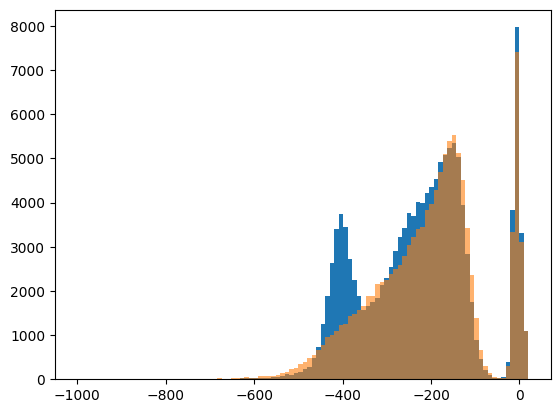

In [251]:
bin = 100


bin1,edge1,_ = plt.hist(chargeCs, bins=bin, range=(-1000,20))
bin2,edge2,_= plt.hist(chargeN, bins=bin, range=(-1000,20), alpha=0.6)
#ùplt.savefig('hist1_40.pdf')

<BarContainer object of 35 artists>

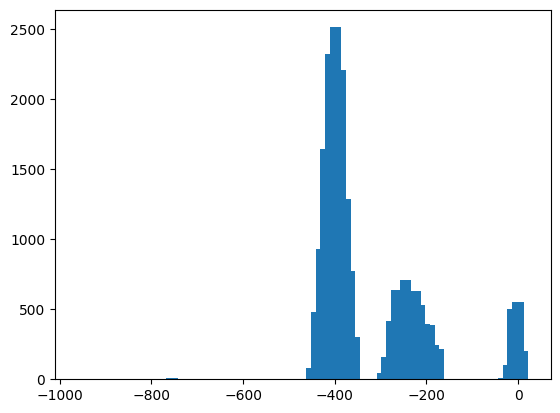

In [252]:
binTot = bin1-bin2
edge1=edge1[1:]
edge1  = edge1[binTot>0] 
binTot_C = binTot[binTot>0]

plt.bar(edge1,binTot_C,width=25)

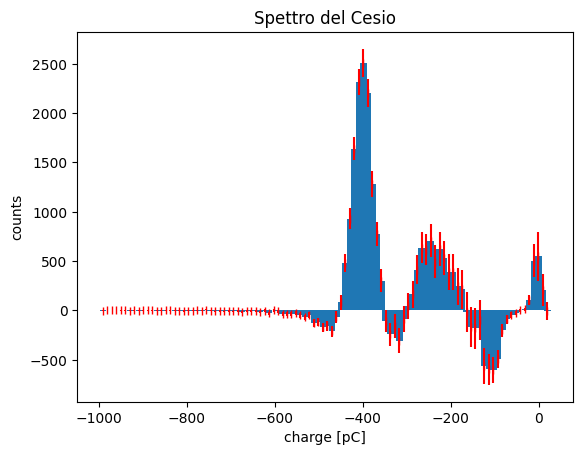

In [253]:
plt.bar(edge2[1:],binTot,width=15)
""""
cov=(np.mean(bin1*bin2)-np.mean(bin1)*np.mean(bin2))
print(cov)
corr=cov/(np.std(bin1)*np.std(bin2))
print(corr)
"""
err=np.sqrt(bin1+bin2)
plt.errorbar(edge2[1:], binTot, err*2, color='red', fmt='|')
plt.title("Spettro del Cesio")
plt.ylabel("counts")
plt.xlabel("charge [pC]")
plt.savefig("SpettroSchifo.pdf")

[0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00 1.000e+00 0.000e+00
 3.000e+00 1.000e+00 2.000e+00 1.000e+00 5.000e+00 0.000e+00 1.000e+00
 1.000e+00 2.000e+00 1.000e+00 4.000e+00 2.000e+00 3.000e+00 4.000e+00
 3.000e+00 2.000e+00 8.000e+00 2.000e+00 1.000e+00 2.000e+00 3.000e+00
 5.000e+00 7.000e+00 8.000e+00 2.000e+00 7.000e+00 6.000e+00 1.000e+01
 7.000e+00 1.900e+01 1.800e+01 2.600e+01 2.500e+01 3.100e+01 2.600e+01
 3.500e+01 5.600e+01 5.500e+01 6.600e+01 1.120e+02 1.060e+02 1.490e+02
 1.680e+02 2.340e+02 2.720e+02 4.800e+02 7.390e+02 1.251e+03 1.879e+03
 2.634e+03 3.405e+03 3.730e+03 3.457e+03 2.718e+03 2.244e+03 1.877e+03
 1.560e+03 1.655e+03 1.739e+03 1.839e+03 2.124e+03 2.300e+03 2.535e+03
 2.904e+03 3.222e+03 3.417e+03 3.756e+03 3.707e+03 4.021e+03 3.980e+03
 4.226e+03 4.355e+03 4.541e+03 4.916e+03 5.078e+03 5.224e+03 5.349e+03
 5.036e+03 3.938e+03 2.837e+03 1.759e+03 8.850e+02 4.540e+02 2.120e+02
 8.800e+01 3.900e+01 3.800e+01 4.300e+01 3.950e+02 3.833e+03 7.968e+03
 3.315

ValueError: x and y must have same first dimension, but have shapes (34,) and (100,)

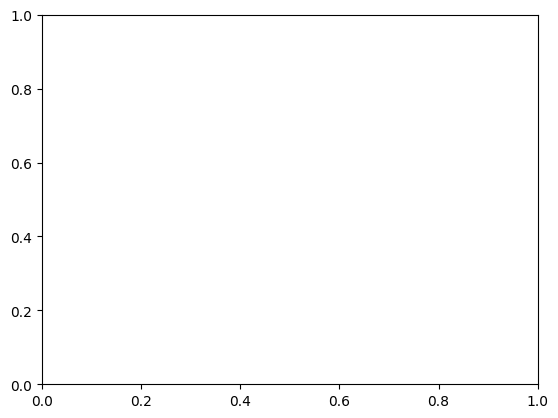

In [241]:
print(bin1)
print(type(bin1))
print(bin2)
plt.plot(edge1[1:], bin1-bin2, '.')


[-1.00000000e+03 -9.89799988e+02 -9.79599976e+02 -9.69400024e+02
 -9.59200012e+02 -9.49000000e+02 -9.38799988e+02 -9.28599976e+02
 -9.18400024e+02 -9.08200012e+02 -8.98000000e+02 -8.87799988e+02
 -8.77599976e+02 -8.67400024e+02 -8.57200012e+02 -8.47000000e+02
 -8.36799988e+02 -8.26599976e+02 -8.16400024e+02 -8.06200012e+02
 -7.96000000e+02 -7.85799988e+02 -7.75599976e+02 -7.65400024e+02
 -7.55200012e+02 -7.45000000e+02 -7.34799988e+02 -7.24599976e+02
 -7.14400024e+02 -7.04200012e+02 -6.94000000e+02 -6.83799988e+02
 -6.73599976e+02 -6.63400024e+02 -6.53200012e+02 -6.43000000e+02
 -6.32799988e+02 -6.22599976e+02 -6.12400024e+02 -6.02200012e+02
 -5.92000000e+02 -5.81799988e+02 -5.71599976e+02 -5.61400024e+02
 -5.51200012e+02 -5.41000000e+02 -5.30799988e+02 -5.20599976e+02
 -5.10399994e+02 -5.00200012e+02 -4.90000000e+02 -4.79799988e+02
 -4.69600006e+02 -4.59399994e+02 -4.49200012e+02 -4.39000000e+02
 -4.28799988e+02 -4.18600006e+02 -4.08399994e+02 -3.98200012e+02
 -3.88000000e+02 -3.77799

<BarContainer object of 100 artists>

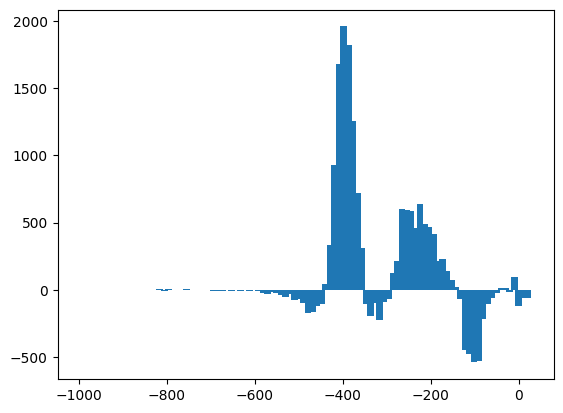

In [113]:
print(edge1)

plt.bar(edge1[1:], bin1-bin2, width=15)
#plt.yscale("log")

In [219]:
cov=(np.mean(bin1*bin2)-np.mean(bin1)*np.mean(bin2))
print(cov)
corr=cov/(np.std(bin1)*np.std(bin2))
print(corr)

2848233.1590999993
0.9597326722547752
